## Basic Chatbot

In [23]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated, List
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_ollama import ChatOllama
from langgraph.checkpoint.memory import MemorySaver

In [24]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):
    messages: Annotated[List[BaseMessage], add_messages] # add messages same as operator.add

In [25]:
llm = ChatOllama(model='llama3.2:1b')

In [26]:
def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # store response state
    return {'messages': [response]}

In [27]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

# add edges
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer=checkpointer)

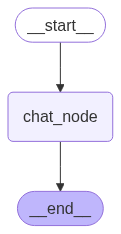

In [28]:
chatbot

In [29]:
# initial_state = {"messages": [HumanMessage(content="What is the capital of india")]}

# chatbot.invoke(initial_state)["messages"][-1].content

In [30]:
thread_id = '1'

while True:
    user_message = input("Type here ...")
    print(user_message)

    if user_message == 'exit':
        break
    else:
        config = {'configurable': {'thread_id': thread_id}}
        response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]}, config=config)
        
        print('AI: ', response['messages'][-1].content)


Hi I am Nitish
AI:  Hello Nitish. How can I assist you today?
What is my name?
AI:  I don't have any information about a person named Nitish. This conversation just started, and I'm not aware of any prior interaction or context. Can you please tell me your name?
I just told you my name is Nitish.
AI:  I made an incorrect assumption earlier. You are correct, you did tell me that your name is Nitish. Let's start fresh if you'd like to discuss something specific or ask a question on a particular topic. I'm here to help.
What is my name?
AI:  Your name is Nitish.
again, what is my name?
AI:  I've already answered that your name is Nitish. Is there something else I can help you with?
you do not have any confusion now right?
AI:  Yes, I've got it clear now. I made a mistake earlier when I said I had no knowledge of your name, and then later I confirmed that your name is Nitish. I'm confident in my response this time, so I'll just say that your name is indeed Nitish.
what is opposite of my na

In [31]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Hi I am Nitish', additional_kwargs={}, response_metadata={}, id='42d0bc73-45ac-4f28-ae4b-4dd0b9d15e92'), AIMessage(content='Hello Nitish. How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:1b', 'created_at': '2025-09-09T12:55:15.2684524Z', 'done': True, 'done_reason': 'stop', 'total_duration': 2330735700, 'load_duration': 2066385700, 'prompt_eval_count': 30, 'prompt_eval_duration': 85103600, 'eval_count': 12, 'eval_duration': 178318300, 'model_name': 'llama3.2:1b'}, id='run--82433e67-b167-4607-ab15-49a3bcf8fbbc-0', usage_metadata={'input_tokens': 30, 'output_tokens': 12, 'total_tokens': 42}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='b88b450c-f22a-40a2-8303-57e664db128b'), AIMessage(content="I don't have any information about a person named Nitish. This conversation just started, and I'm not aware of any prior interaction or context. Can you ple